# What is CNN?

### CNN – Convolutional Neural Network 

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which deals with images, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. By applying relevant filters, it is possible by a Convnet to capture the Spatial and Temporal dependencies of an image. By reducing the number of parameters, the performance of the model will increase, which means the network can train itself to better understand complexity of the image. Therefore, ConvNet is used to reduce the image in a way that we do not lose many important features and also is easier to process.


### Convolution Layer — The Kernel

 

<img src="Image1.gif" width="400" align="center">

    
As it is shown in the above demonstration, the green square matrix is a $5*5*1$ input image (1 represents number of channels, ie. RGB has 3 channels). The yellow square matrix represents the Kernel/Filter, K and carries out the convolution operation. In here K is a $3*3*1$ matrix. The yellow matrix shifts 9 times with a stride value starting from top left until it parses the complete width. Then it moves down one cell and repeat the process until the end. On every move, it performs a matrix multiplication operation.


<img src="small8.png" width="100"> <img src="8.png" width="100">



This operation can have 2 results; 1. Reducing dimensions (called Valid Padding) , 2. Increasing dimensions or remaining the same (called Same Padding). 

#### Padding:
1.	Valid padding (padding == “VALID”) – the input image is not padded, i.e. the filter window stays inside the input image. Basically, it discards the border elements of input, which means that there can be a loss of information. The loss of information depends on the size of the kernel and the stride.
2.	Same Padding (padding == ”SAME”) – the name “SAME” is derived from the fact that the output size is the same as the input size (this is only the case when stride = 1). By using this type of padding, we are ensuring that the filter is applied to all the elements of the input. We get output values by applying the filter to all input elements, whereas the border elements are computed using zero padding. The output is therefore smaller or the same size as the input.

#### i-th layer of CNN:
It is comprised of the convolutional layer and pooling layer. The number of such layers within the network depends on the images’ complexity. If the algorithm has to capture many low-level details, the number of layers will increase as well as network’s complexity.

#### Pooling Layer:
It is also another method for reducing the spatial size of Convolved Feature which helps to decrease the computational power for processing the data. It also extracts the dominant features to maintain an effective training model.

There are two types of Pooling: Max Pooling and Average Pooling. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.

<img src="Image2.png" width="400">



For Further Information please read the full paper on CNN. [Reference](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)



# What is EfficientNet?


EfficientNet is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient. Unlike conventional practice that arbitrary scales these factors, the EfficientNet scaling method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients. For example, if we want to use $2^N$ times more computational resources, then we can simply increase the network depth by $α^N$, width by $β^N$, and image size by $γ^N$, where $α,β,γ$ are constant coefficients determined by a small grid search on the original small model. EfficientNet uses a compound coefficient $ϕ$ to uniformly scales network width, depth, and resolution in a principled way.

<img src="Image3.png" width="400">


### Pytorch

It's a machine learning library that is well suited for computer vision tasks as in the case of our dataset. Pytorch defines a class called tensor to store and operate on multidimensional rectangular arrays of numbers similar to numpy arrays. They can be operated on CUDA-capable GPU.
We employ the torch.nn module of Pytorch which makes it easy to define computational graphs and take gradients for complex neural networks. We also make use of the torch.optim module which implements various optimization algorithms used for building neural networks. 

# Dataset 

The dataset consists of nearly 5900 Chest X-Ray images. In this framework we have two sets of Label 1: Normal vs Pneumonia and Label 2: ARDS, COVID-19, SARS and Normal.
Our main aim for this project is to build a COVID-19 classifier which can classify Chest X-Ray scan that classifies images into these classes. We have loaded and fine tuned the pretrained **EffiecientNet** model and also created a simple **pytorch(library for CNN)** trainer to train the model.



https://www.kaggle.com/code/amyjang/tensorflow-pneumonia-classification-on-x-rays

In [1]:
import os
import numpy as np
import random
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [38]:
metadata = pd.read_csv("../......./covid_data/Chest_xray_Corona_Metadata.csv")
# csv file contianing image name and Label as "Normal" and "Pneumonia". "Label_2_Virus_category" is the label we will be working, with Covid-19 as postiive category and rest negative.
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [39]:
#creating target variable from Label_2_Virus_category
print(metadata['Label_2_Virus_category'].value_counts())
metadata['Target'] =  metadata['Label_2_Virus_category'] == "COVID-19"
metadata['Target'].value_counts()

COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64


False    5852
True       58
Name: Target, dtype: int64

In [29]:
# compressing the image to 90% quality first

normal_path  = "../......./"
compress_path = "../....../data_compress"

for x in metadata['X_ray_image_name']:
    imagepath = os.path.sep.join([normal_path, x])
    img = Image.open(imagepath).convert('RGB')
    imagepath_compress = os.path.sep.join([compress_path, x])
    img.save(imagepath_compress,quality=90)

In [30]:
# Resizing the images to 224*224 pixel and saving it to folder dataset_f
data_path  = "../....../"
for x in metadata['X_ray_image_name']:
    imagepath = os.path.sep.join([compress_path, x])
    img = Image.open(imagepath)
    img = img.resize((224,224))
    imagepath_f = os.path.sep.join([data_path, x])
    img.save(imagepath_f)


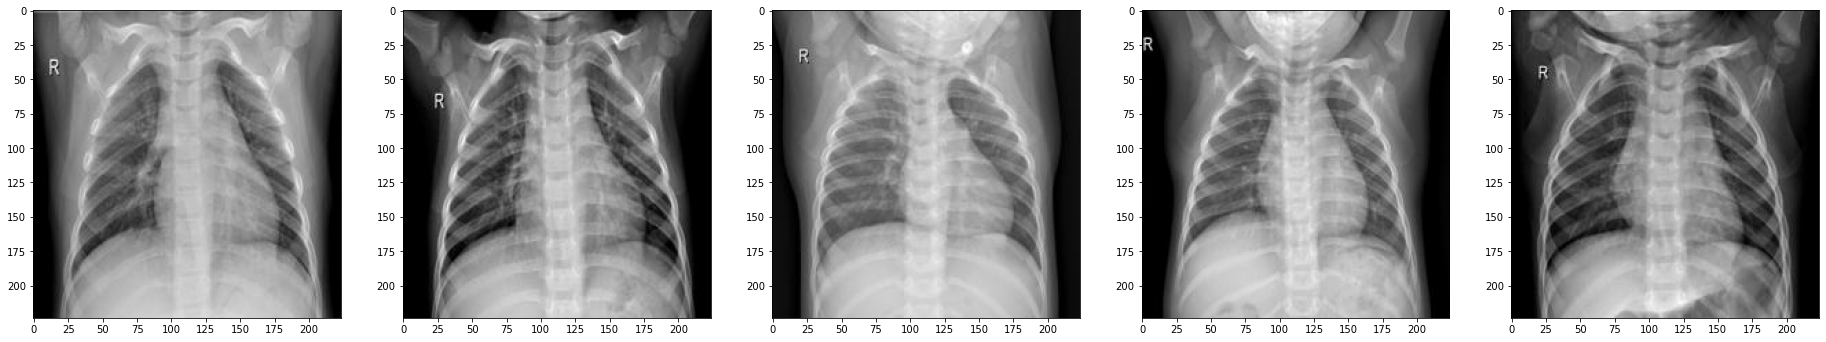

In [32]:
df = metadata[metadata['Target'] == False]['X_ray_image_name']
df.reset_index(inplace=True, drop=True)
imagepath = "../.../"
rows = 1
columns = 5
fig=plt.figure(figsize=(32, 32))
for i in range(1,rows*columns+1):
    normal = Image.open(os.path.sep.join([imagepath, df[i]]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(normal)
plt.show()

The graphs above show few X-ray images of Non-covid patients.

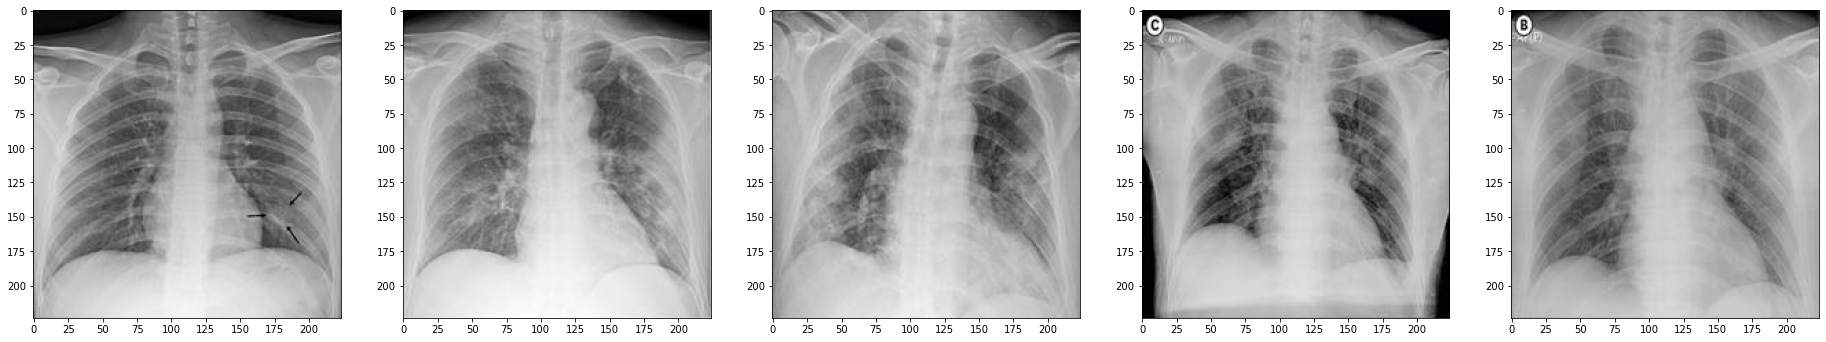

In [33]:
df = metadata[metadata['Target'] == True]['X_ray_image_name']
df.reset_index(inplace=True, drop=True)
fig=plt.figure(figsize=(32, 32))
for i in range(1,rows*columns+1):
    normal = Image.open(os.path.sep.join([imagepath, df[i]]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(normal)
plt.show()

These above X-rays are of Covid patients

In [2]:
# Reduced data set due to memory limit
metadata = pd.read_csv("../...csv")
metadata['Target'] =  metadata['Label_2_Virus_category'] == "COVID-19"
# Split of Positive class and negative class in Trianing set.
metadata[metadata['Dataset_type'] == 'TRAIN']['Target'].value_counts()

False    1751
True       51
Name: Target, dtype: int64

In [3]:
# Split of Positive class and negative class in Test set.
metadata[metadata['Dataset_type'] == 'TEST']['Target'].value_counts()

False    624
True       7
Name: Target, dtype: int64

In [4]:
# creating the csv to read the image for training set.
train_label = metadata[metadata['Dataset_type'] == "TRAIN"]
train_label = train_label[["X_ray_image_name","Target"]]
train_label["Target"] = train_label["Target"].astype(int)
train_label.to_csv('train_labels.csv', index = False)

In [5]:
# creating the csv to read the image for test set.
test_label = metadata[metadata['Dataset_type'] == "TEST"]
test_label = test_label[["X_ray_image_name","Target"]]
test_label["Target"] = test_label["Target"].astype(int)
test_label.to_csv('test_labels.csv', index = False)

In [6]:
from torchsummary import summary
import PIL
import sys
import torch
from time import time
import torchvision
from PIL import Image
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from torch.autograd import Variable
import torchvision.transforms as transforms
from efficientnet_pytorch import EfficientNet

Defining the dataset class which will pair images with labels. In this step we are creating the training dataset with images and labels that can be processed by Pytorch. Our learning algorithm must be provided with a tensor which will be created in the following steps.


In [7]:
class Dataset(data.Dataset):
    def __init__(self,csv_path,images_path,transform=None):
        self.train_set=pd.read_csv(csv_path) #Read The CSV and create the dataframe
        self.train_path=images_path #Images Path
        self.transform=transform # Augmentation Transforms
    def __len__(self):
        return len(self.train_set)
    
    def __getitem__(self,idx):
        file_name=self.train_set.iloc[idx][0] 
        label=self.train_set.iloc[idx][1]
        img=Image.open(os.path.join(self.train_path,file_name)) #Loading Image
        if self.transform is not None:
            img=self.transform(img)
        return img,label

We are using dataset Class that we already created above to create an untransformed training dataset as mentioned above.

In [8]:
BASE_PATH = "...covid_data/" # folder containing train and test csv files and final image folder "datatset_f"
training_set_untransformed=Dataset(os.path.join(BASE_PATH,'train_labels.csv'),os.path.join(BASE_PATH,'dataset_f/'))
print(type(training_set_untransformed))

<class '__main__.Dataset'>


We then employed the transforms.Compose method to randomly apply rotation and horizontal translation and convert the resulting matrix to a tensor. Such a transform is useful for data augmentation. (Sharman, 2021)

In [9]:
transform_train = transforms.Compose([transforms.Resize((224,224)),transforms.RandomApply([
        torchvision.transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip()],0.8),
		transforms.ToTensor()])

We upsampled our minority class in order to make the dataset balanced and applied the previously created transformations. Though the original dataset contains 5900 datapoints, we had to reduce the training sample to 1802 images due to memory issues. We need to run the CNN on GPU to gain on speed however due to memory cap of 4 GB we had  to reduce the number of datapoints in order to actually run the model and fit in GPU. This is because EfficientNet(b-2)has as many as 7 million parameters. Furthermore, we converted the grey scale images to RGB because the model requires a tensor with 3 channels which cannot be altered.

In [10]:
new_created_images=[]
for j in range (len(training_set_untransformed)):
    if training_set_untransformed[j][1]==1:
        for k in range(35):  # with 51 positive cases the data set now has 51*35 (1785 count)
            # training_set_untransformed[j][0] =  training_set_untransformed[j][0].convert('RGB')
            transformed_image = transform_train(training_set_untransformed[j][0])
            new_created_images.append((transformed_image,1))

    else:
        transformed_image = transform_train(training_set_untransformed[j][0])
        new_created_images.append((transformed_image,0))

print(len(new_created_images))

3536


These newly created images were then split into training and validation sets in 80-20 ratio.

In [11]:
train_size = int(0.8 * len(new_created_images))
validation_size = len(new_created_images) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(new_created_images, [train_size,validation_size])

We set the learning rate as defined below. We then used the pytorch dataloader function which creates batches of 16 from the training data set. Shuffle is set to true, thereby implying equal representation of the classes in every batch.We started with learning_rate=1e-3 with which we got Accuracy = 55%, with learning_rate=1e-4 we got accuracy of 99% on validation set.

In [12]:
# setting learning rate
learning_rate=1e-4


In [13]:
training_generator = data.DataLoader(train_dataset,shuffle=True,batch_size=16,pin_memory=True)

Cuda allows us to run the code on our GPU successfully.

In [14]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


The code below imports EfficientNet-b2 and sets the number of classes to 2


In [15]:
model = EfficientNet.from_pretrained('efficientnet-b2', num_classes=2)


Loaded pretrained weights for efficientnet-b2


We load the model into the GPU memory

In [16]:
model.to(device)

Conv2dStaticSamePadding(
        288, 48, kernel_size=(1, 1), stride=(1, 1), bias=False
        (static_padding): Identity()
      )
      (_bn2): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_swish): MemoryEfficientSwish()
    )
    (7): MBConvBlock(
      (_expand_conv): Conv2dStaticSamePadding(
        48, 288, kernel_size=(1, 1), stride=(1, 1), bias=False
        (static_padding): Identity()
      )
      (_bn0): BatchNorm2d(288, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_depthwise_conv): Conv2dStaticSamePadding(
        288, 288, kernel_size=(5, 5), stride=(1, 1), groups=288, bias=False
        (static_padding): ZeroPad2d(padding=(2, 2, 2, 2), value=0.0)
      )
      (_bn1): BatchNorm2d(288, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        288, 12, kernel_size=(1, 1), stride=(1, 1)
        (st

In [17]:
print(summary(model, input_size=(3, 224, 224)))

 --
|    |    └─Conv2dStaticSamePadding: 3-114         86,400
|    |    └─BatchNorm2d: 3-115                     1,440
|    |    └─Conv2dStaticSamePadding: 3-116         18,000
|    |    └─BatchNorm2d: 3-117                     1,440
|    |    └─Conv2dStaticSamePadding: 3-118         21,630
|    |    └─Conv2dStaticSamePadding: 3-119         22,320
|    |    └─Conv2dStaticSamePadding: 3-120         86,400
|    |    └─BatchNorm2d: 3-121                     240
|    |    └─MemoryEfficientSwish: 3-122            --
|    └─MBConvBlock: 2-16                           --
|    |    └─Conv2dStaticSamePadding: 3-123         86,400
|    |    └─BatchNorm2d: 3-124                     1,440
|    |    └─Conv2dStaticSamePadding: 3-125         18,000
|    |    └─BatchNorm2d: 3-126                     1,440
|    |    └─Conv2dStaticSamePadding: 3-127         21,630
|    |    └─Conv2dStaticSamePadding: 3-128         22,320
|    |    └─Conv2dStaticSamePadding: 3-129         86,400
|    |    └─BatchNorm2d: 

We saved weights in order not to lose everything in case of a crash.

In [18]:
PATH_SAVE='./Weights1/'
if(not os.path.exists(PATH_SAVE)):
    os.mkdir(PATH_SAVE)

For loss calculation, we used CrossEntropyLoss and Adam optimizer which updates weights.

In [19]:
criterion = nn.CrossEntropyLoss()
# lr_decay=0.99
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
eye = torch.eye(2).to(device)
classes=[0,1]

Epochs were set to 11

In [21]:
history_accuracy=[]
history_loss=[]
epochs = 11

We ran the code for 11 epochs. At the 10th and 11th epoch, the accuracy obtained was 100% for the training set.

In [22]:
for epoch in range(epochs):  
    running_loss = 0.0
    correct=0
    total=0
    class_correct = list(0. for _ in classes)
    class_total = list(0. for _ in classes)
    
    for i, data in enumerate(training_generator, 0):
        inputs, labels = data
        t0 = time()
        inputs, labels = inputs.to(device), labels.to(device)
        labels = eye[labels]
        optimizer.zero_grad()
        #torch.cuda.empty_cache()
        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])
        _, predicted = torch.max(outputs, 1)
        _, labels = torch.max(labels, 1)
        c = (predicted == labels.data).squeeze()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        accuracy = float(correct) / float(total)
        
        history_accuracy.append(accuracy)
        history_loss.append(loss)
        
        loss.backward()
        optimizer.step()
        
        for j in range(labels.size(0)):
            label = labels[j]
            class_correct[label] += c[j].item()
            class_total[label] += 1
        
        running_loss += loss.item()
       
        print( "Epoch : ",epoch+1," Batch : ", i+1," Loss :  ",running_loss/(i+1)," Accuracy : ",accuracy,"Time ",round(time()-t0, 2),"s" )
    for k in range(len(classes)):
        if(class_total[k]!=0):
            print('Accuracy of %5s : %2d %%' % (classes[k], 100 * class_correct[k] / class_total[k]))
        
    print('[%d epoch] Accuracy of the network on the Training images: %d %%' % (epoch+1, 100 * correct / total))
    
    if epoch%10==0 or epoch==0:
        torch.save(model.state_dict(), os.path.join(PATH_SAVE,str(epoch+1)+'_'+str(accuracy)+'.pth'))
        
torch.save(model.state_dict(), os.path.join(PATH_SAVE,'Last_epoch'+str(accuracy)+'.pth'))

0  Batch :  130  Loss :   3.774291856404834e-06  Accuracy :  1.0 Time  0.28 s
Epoch :  10  Batch :  131  Loss :   3.7533291349630283e-06  Accuracy :  1.0 Time  0.29 s
Epoch :  10  Batch :  132  Loss :   3.725572148520358e-06  Accuracy :  1.0 Time  0.27 s
Epoch :  10  Batch :  133  Loss :   3.723272775658122e-06  Accuracy :  1.0 Time  0.29 s
Epoch :  10  Batch :  134  Loss :   3.6958207659362214e-06  Accuracy :  1.0 Time  0.29 s
Epoch :  10  Batch :  135  Loss :   3.6822415491855052e-06  Accuracy :  1.0 Time  0.28 s
Epoch :  10  Batch :  136  Loss :   3.6561523494098056e-06  Accuracy :  1.0 Time  0.28 s
Epoch :  10  Batch :  137  Loss :   3.629573873576929e-06  Accuracy :  1.0 Time  0.29 s
Epoch :  10  Batch :  138  Loss :   3.604892304542701e-06  Accuracy :  1.0 Time  0.29 s
Epoch :  10  Batch :  139  Loss :   3.5796546443708437e-06  Accuracy :  1.0 Time  0.28 s
Epoch :  10  Batch :  140  Loss :   3.574787263214775e-06  Accuracy :  1.0 Time  0.29 s
Epoch :  10  Batch :  141  Loss :   3

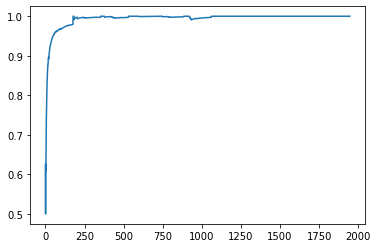

In [23]:
# Progression of Accuracy with each batch
plt.plot(history_accuracy)


In [36]:
# to clear the cache in case of crash due to memory issue or restart the kernel again. This is just for demontrative 
# purpose Dont run this block if model is successfully run as it will erase the variables and weights.
torch.cuda.empty_cache()

# Model evaluation 
# model.eval()

We the check how the model performs on the validation dataset. The accuracy for this was 0.9957.

In [24]:
correct_counter=0
for i in range(len(validation_dataset)):
    image_tensor = validation_dataset[i][0].unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    if index == validation_dataset[i][1]:
        correct_counter+=1
print("Accuracy=",correct_counter/len(validation_dataset))

Accuracy= 0.9957627118644068


We applied the transforms to the test data set so that it has the same distribution as the training data set.

In [25]:
test_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.RandomApply([
        torchvision.transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip()],0.8),
		transforms.ToTensor()])

We then created the function predict_image that would predict the class to which the images might belong in test data.

In [26]:
def predict_image(image):
    image_tensor = test_transforms(image)
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [27]:
test_f =pd.DataFrame(columns=['File','Label','Predicted'])  # dataframe to save the results
IMG_TEST_PATH=os.path.join(BASE_PATH,'dataset_f/')
for i in range(len(test_label)):
    img=Image.open(IMG_TEST_PATH+test_label.iloc[i][0])
    prediction=predict_image(img)
    test_f=test_f.append({'File': test_label.iloc[i][0],'Label': test_label.iloc[i][1], 'Predicted':        
                                 prediction},ignore_index=True)

Exporting the final results!. Its better to save the results in csv file for later purpose.

In [28]:
test_f.to_csv('test_results.csv')

In [29]:
from sklearn import metrics
import pandas as pd
data = pd.read_csv('test_results.csv')
print(metrics.classification_report(data['Label'],data['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       624
           1       0.58      1.00      0.74         7

    accuracy                           0.99       631
   macro avg       0.79      1.00      0.87       631
weighted avg       1.00      0.99      0.99       631



Judging by the outputs we got, using image recognition algorithms such as the ones used in our case can be successfully used to classify x-rays and other such images by the medical community. Our dataset was a near to perfect representation of the reality since we originally had highly imbalanced classes( 7 positive cases and 624 non-positive (negative) cases). Thus it is safe to conclude that we could possibly get similar results even in a real world setting which might actually make the job of a medical practitioner easier. 
It's also simple to employ the model as it doesn't require a huge financial investment since most hospitals, even in developing countries like India have such hardware facilities available. 
Our project serves more like a note to the medical community that such algorithms can successfully be used to assist the medical practitioners and reduce their workload substantially. 

In [1]:
from sklearn import metrics
import pandas as pd
df = pd.read_csv('Gamification.csv')


In [4]:
print(metrics.classification_report(df['Actual Label'],df['Predicted']))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.25      0.67      0.36         3

    accuracy                           0.65        20
   macro avg       0.58      0.66      0.56        20
weighted avg       0.82      0.65      0.70        20



#### References
https://towardsdatascience.com/high-accuracy-covid-19-prediction-from-chest-x-ray-images-using-pre-trained-convolutional-neural-2ec96484ce0

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

https://cs231n.github.io/neural-networks-1/

https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html